| [**Overview**](./00_overview.ipynb) | [Getting Started](./01_jupyter_python.ipynb) | **Examples:** | [Access](./02_accessing_indexing.ipynb) | [Transform](./03_transform.ipynb) | [Plotting](./04_simple_vis.ipynb) | [Norm-Spiders](./05_norm_spiders.ipynb) | [Minerals](./06_minerals.ipynb) | **Workflows:** | [lambdas](./07_lambdas.ipynb) | [CIPW](./08_CIPW_Norm.ipynb)  | [ML](./11_geochem_ML.ipynb) | [Spatial Data](./12_spatial_geochem.ipynb) |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |

# CIPW Norm

The CIPW (W. Cross, J. P. Iddings, L. V. Pirsson, and H. S. Washington) Norm was
introducted as a standard procedure for the estimation of rock-forming mineral
assemblages of igneous rocks from their geochemical compositions [Cross1902] .
This estimation process enables the approximate classificaiton of
microcrystalline and partially crystalline rocks using a range of
mineralogically-based classificaiton systems (e.g. most IUGS classifications),
and the generation of normative-mineral modifiers for geochemical classificaiton
systems.

A range of updated, modified and adjusted Norms were published in the century
following the original publication of the CIPW Norm, largely culminating in
Surendra Verma's 2003 paper "A revised CIPW norm" which enumerates an
algorithm for the estimation of an anhydrous Standard Igenous Norm (SIN)
[Verma2003] .
This was subsequently updated with the publication of IgRoCS [Verma2013] .
A version of this algorithm has now been implemented in
`pyrolite` (`pyrolite.mineral.normative.CIPW_norm`), and an overview
of the implementation and the currently available options is given below.

For the purposes of testing, pyrolite includes a file containing the outputs from
Verma's SINCLAS/IgRoCS program, we'll use this as an example here.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pyrolite
from pyrolite.util.meta import pyrolite_datafolder

df = (
    pd.read_csv(pyrolite_datafolder() / "testing" / "CIPW_Verma_Test.csv")
    .dropna(how="all", axis=1)
    .pyrochem.parse_chem()
)
df.pyrochem.compositional = df.pyrochem.compositional.apply(
    pd.to_numeric, errors="coerce"
).fillna(0)
df[[c for c in df.columns if "NORM" in c]] = df.loc[
    :, [c for c in df.columns if "NORM" in c]
].apply(pd.to_numeric, errors="coerce")

The CIPW Norm can be accessed via `pyrolite.mineral.normative.CIPW_norm`,
and expects a dataframe as input containing major element oxides (in wt%) and
can also use a select set of trace elements (in ppm).




In [2]:
from pyrolite.mineral.normative import CIPW_norm

NORM = CIPW_norm(df.pyrochem.compositional)

We can quickly check that this includes mineralogical data:




In [3]:
NORM.columns

Index(['quartz', 'zircon', 'potassium metasilicate', 'anorthite',
       'sodium metasilicate', 'acmite', 'thenardite', 'albite', 'orthoclase',
       'perovskite', 'nepheline', 'leucite', 'dicalcium silicate',
       'kaliophilite', 'apatite', 'fluroapatite', 'fluorite', 'pyrite',
       'chromite', 'ilmenite', 'calcite', 'corundum', 'rutile', 'magnetite',
       'hematite', 'forsterite', 'fayalite', 'clinoferrosilite',
       'clinoenstatite', 'ferrosilite', 'enstatite', 'wollastonite',
       'cancrinite', 'halite', 'titanite', 'diopside', 'hypersthene',
       'olivine'],
      dtype='object')

The function accepts a few keyword arguments, all to do with the iron compositions
and related adjustment/corrections:

* `Fe_correction = "LeMaitre" | "Middlemost"`
  For specifying the Fe-correction method/function. Currently includes LeMaitre's
  correction method [LeMaitre1976]_ (the default) and Middlemost's TAS-based
  correction [Middlemost1989]_ .

* `Fe_correction_mode = 'volcanic'`
  For specificying the Fe-correction mode, for LeMaitre's correction.

* `adjust_all_Fe = False`
  Specifying whether you want to adjust all iron compositions, or only those
  which are partially specified (i.e. only have a singular value for one of
  FeO, Fe2O3, FeOT, Fe2O3T).




In [4]:
NORM = CIPW_norm(df.pyrochem.compositional, Fe_correction="Middlemost")

For the purpose of establishing the congruency of our algorithm with Verma's,
we'll use `adjust_all_Fe = True` and LeMaitre's correction. Notably, this
won't make too much difference to the format of the output, but it will adjust
the estimates of normative mineralogy depending on oxidation state.


In [5]:
NORM = CIPW_norm(
    df.pyrochem.compositional,
    adjust_all_Fe=True,
    Fe_correction="LeMaitre",
    Fe_correction_mode="volcanic",
)

Now we have the normative mineralogical outputs, we can have a look to see how
these compare to some relevant geochemical inputs:




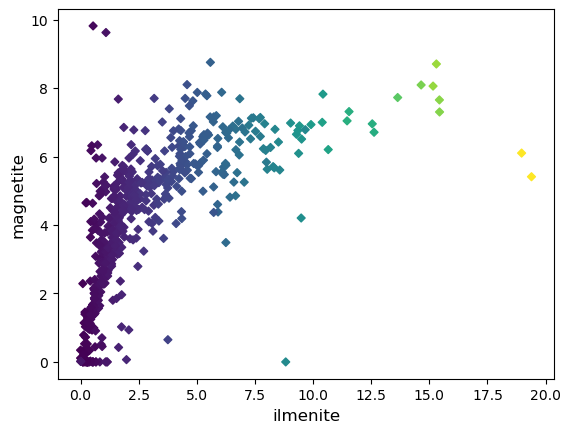

In [6]:
ax = NORM[["ilmenite", "magnetite"]].pyroplot.scatter(clip_on=False, c=df["TiO2"])

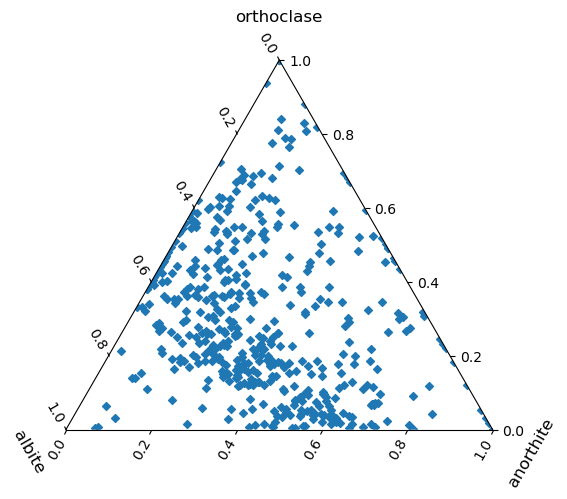

In [7]:
ax = NORM[["orthoclase", "albite", "anorthite"]].pyroplot.scatter()

## References


[Cross1902] Cross, W., Iddings, J. P., Pirsson, L. V., &
    Washington, H. S. (1902).
    A Quantitative Chemico-Mineralogical Classification and Nomenclature of
    Igneous Rocks. The Journal of Geology, 10(6), 555–690.
    [doi: 10.1086/621030](https://doi.org/10.1086/621030)

[Verma2003] Verma, S. P., Torres-Alvarado, I. S., & Velasco-Tapia, F. (2003).
    A revised CIPW norm.
    Swiss Bulletin of Mineralogy and Petrology, 83(2), 197–216.

[Verma2013] Verma, S. P., & Rivera-Gomez, M. A. (2013). Computer Programs
    for the Classification and Nomenclature of Igneous Rocks.
    Episodes, 36(2), 115–124.

[LeMaitre1976] Le Maitre, R. W (1976).
    Some Problems of the Projection of Chemical Data into Mineralogical
    Classifications.
    Contributions to Mineralogy and Petrology 56, no. 2 (1 January 1976): 181–89.
    [doi: doi.org/10.1007/BF00399603](https://doi.org/10.1007/BF00399603)

[Middlemost1989] Middlemost, Eric A. K. (1989). Iron Oxidation Ratios,
    Norms and the Classification of Volcanic Rocks.
    Chemical Geology 77, 1: 19–26.
    [doi: doi.org/10.1016/0009-2541(89)90011-9.](https://doi.org/10.1016/0009-2541(89)90011-9.)





----
<div class='alert alert-success'><font size="+1" color="black"><b>We made it to the end of the core <code>pyrolite</code> section! </b></font> </div>

----

| [**Overview**](./00_overview.ipynb) | [Getting Started](./01_jupyter_python.ipynb) | **Examples:** | [Access](./02_accessing_indexing.ipynb) | [Transform](./03_transform.ipynb) | [Plotting](./04_simple_vis.ipynb) | [Norm-Spiders](./05_norm_spiders.ipynb) | [Minerals](./06_minerals.ipynb) | **Workflows:** | [lambdas](./07_lambdas.ipynb) | [CIPW](./08_CIPW_Norm.ipynb)  | [ML](./11_geochem_ML.ipynb) | [Spatial Data](./12_spatial_geochem.ipynb) |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |